In [1]:
# main library used by the book
import numpy as np 

# cause graphs
%matplotlib inline
import matplotlib.pyplot as plt

![](https://images-na.ssl-images-amazon.com/images/I/61gAY7APCQL._SX397_BO1,204,203,200_.jpg) 

This jupyter notebook contains my notes while reading [Grokking Deep Learning by Andrew Trask](https://www.manning.com/books/grokking-deep-learning). The book is sold as "a very gentle introduction to Deep Learning" and covers the intuition more than the theory.

# Chapter 1: Introducing Deep Learning

Deep Learning (DL) is is an intersection of Machine Learning (ML) & Artificial Intelligence (AI). This book covers the science under the hood of the major DL frameworks so you can understand whats going on when you use popular DL frameworks like Torch, Tensorflow, Keras, etc.

The book covers everything past high school maths needed to grok DL. Find a personal problem I'm interested in which to apply DL to. This couldbe anything where there is a dataset to predict another. Trask (the author) used Twiter to predict the stock market, which led him from barely knowing programming to a job at a hedge fund in 18 months.

# Chapter 2: Fundamental Concepts

DL uses a subset of ML methods, primarily Artificial Neural Networks. 

## Supervised vs Unsupervised ml

Two main types of ML:

- Direct imitation, or formally **supervised ml** is basically a computer looking at a dataset A which predicts B, say weather sensor data predicting probability of rain, and trying to figure out the pattern b/w an input (sensor data) and a output set (actual weather), so when given a new input set it can apply the earlier learned pattern and come up with a prediction.
- Indirect imitation, or fomally **unsupervised ml** looks at a not previously understoond dataset A and tries to find patterns in it. For example, it sorts data into a bunch of clusters. Clustering is the essensce of unsupervised ml. The computer doesn't know what the clusters mean but thats where the human comes in.

## Parametric vs Non-Parametric Learning

A parametric model has a fixed number of parameters to change, while a non-parametric model has infinite parameters.

Supervised parametric dl models take in input data, process them based on a fixed number of adjustable parameters and makes a prediction. The ml model learns the optimium parameters by comparing its predictions to the actual truth, then going back and tinkering with the parameters.

Unsupervised parametric dl models are similar to the supervised since they also use parameters, but they cluster the data into groups and come up with as many parameters as needed.  

DL algos can be either supervised or unsupervised, and either parametric or non-parametric.

# Chp 3: Introduction to Neural Prediction

When using data to predict something, u need as many datapoints as you think the neural net needs to be accurate. For example, when trying to predict if something is in an image, you probabbly need to feed the neural net the entire image.

> Always present enough information to the network, where "enough information" is definned loosely as how much a human might need to make the same prediction.

## simplest possible neural net

In [2]:
# the network
weight = 0.1
def neural_network(input, weight):
    prediction = input * weight
    return prediction

# using the network to predict something
number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input,weight)
pred

0.8500000000000001

Being able to manipulate vectors is a cornerstone technique for Deep Learning. Some functions to do vector math:

In [27]:
def elementwise_multiplication(vec_a, vec_b):
    return [vec_a[i] * vec_b[i] for i in range(len(vec_a))]

def vector_sum(vec_a):
    return sum(vec_a)

def elementwise_addition(vec_a, vec_b):
    return [vec_a[i] + vec_b[i] for i in range(len(vec_a))]
    
def vector_average(vec_a):
    return sum(vec_a) / len(vec_a)

a = [2,2,4]
b = [3,3,9]

# to get the dot product of a and b
vector_sum(elementwise_multiplication(a,b))

48

Testing the [wikipedia example of a dot product](https://en.wikipedia.org/wiki/Dot_product):

In [33]:
a = [1, 3, -5]
b = [4, -2, -1]
vector_sum(elementwise_multiplication(a,b))

3

## neural net with 3 inputs and 1 output

In [53]:
weights = np.array([0.1, 0.2, 0])
def neural_network(input, weights):
    pred = input.dot(weights)
    return pred

toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

# input corresponds to every entry for the  first game of the season
input = np.array([toes[0], wlrec[0], nfans[0]])
print(neural_network(input, weights))

# to go through all the inputs
for input in zip(toes,wlrec,nfans):
    print(neural_network(np.array(input), weights))

0.98
0.98
1.11
1.15
1.08


## neural net with 3 inputs and 3 outputs

In [64]:
weights = [[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred

def vect_mat_mul(vect,matrix):
    out = []
    for m in matrix:
        out.append(np.dot(vect,m))
    return out
        
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# to go through all the inputs
for input in zip(toes,wlrec,nfans):
    print(neural_network(input, weights))

[0.55500000000000005, 0.98000000000000009, 0.96500000000000008]
[0.64000000000000001, 1.1100000000000001, 1.1699999999999999]
[0.92000000000000004, 1.1500000000000001, 1.0900000000000001]
[0.68999999999999995, 1.0800000000000001, 1.2700000000000002]


## a stacked neural network 

3 inputs and 3 outputs, with 2 layers

## a neural net with descent

In [59]:
inputs = np.array([0.25,1.0,0.1])
target = 70 # my weight
weights = np.array([1,3,1])
learning_rate = 0.1

for epoch in range(40):
    pred = np.dot(inputs, weights)
    error = (pred - target)**2
    delta_error = input * (pred - target)
    weights = weights - (delta_error * learning_rate)
print('pred:', pred)
print('weights:', weights)

pred: 70.0000007766
weights: [ 103.47539901   43.9901596     1.4099016 ]


# Chapter 5: Learning Multiple Weights at a Time

### Gradient Descent with Multiple Inputs & Outputs

In [612]:
# step 1: empty network
weights = [ [0.1, 0.1, -0.3], #hurt
           [0.1, 0.2, 0.0], #win
           [0.0, 1.3, 0.1] ]#sad?

def neural_network(input, weights):
    pred = np.dot(input, weights)
    return pred

#Predict
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt = [0.1, 0.0, 0.0, 0.1]
win =[1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01
input = [toes[0],wlrec[0],nfans[0]]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0,0,0]
delta = [0,0,0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

def outer_prod(vec_a, vec_b):
    out = np.zeros((len(vec_a), len(vec_b)))
        
    for i in range(len(vec_a)):
        for j in range(len(vec_b)):
            out[i][j] = vec_a[i]*vec_b[j]
    return out

#updating the weights
weight_deltas = outer_prod(input,delta) * alpha
weights = np.array(weights) - weight_deltas

neural_network([toes[1],wlrec[1],nfans[1]], weights), [hurt[1], win[1], sad[1]]


(array([ 0.3549355,  1.524418 , -0.624401 ]), [0.0, 1, 0.0])

## the below is a shitfight
The [digits dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) contains 1,797 8x8 images.

In [423]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()
print(digits.data.shape)
digits.data # the actual data

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

The dataset contains a visual representation of the image data:

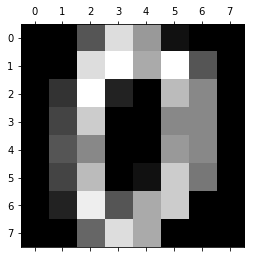

In [428]:
plt.matshow(digits.images[0])

digits.target contains what each datapoint represents:

In [427]:
print(digits.target.shape)
digits.target

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

So the image above, which looks like a zero, so digits.data[0] should be equal to digits.target[0], is equal to 0.

So now to build out a nerual net to classify this.

In [474]:
inputs = digits.data
targets = digits.target
#one weight per input pixel
hidden_weights = np.random.random([64,10])
output_weights = np.random.random(10)
learning_rate = 0.01
epochs = 10
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

So the dot product of each input vector and the weights gives us 10 outputs:

In [473]:
hidden_input = np.dot(inputs[0], hidden_weights)
hidden_output = sigmoid(hidden_input)
hidden_output.shape

(10,)

And the dot product of the hi

In [471]:
np.dot(a, output_weights)

ValueError: shapes (64,) and (10,) not aligned: 64 (dim 0) != 10 (dim 0)

Now, the output numbers seem pretty high, so we might want to normalize the incoming data

In [422]:
#inputs = np.random.random([len(digits.data),64]) # a blank input
#for i, item in enumerate(digits.data):
#    inputs[i] = ((item - digits.data.mean()) / digits.data.std())

In [386]:
print(inputs.shape)
inputs

(1797, 64)


array([[-0.8117562 , -0.8117562 ,  0.01925204, ..., -0.8117562 ,
        -0.8117562 , -0.8117562 ],
       [-0.8117562 , -0.8117562 , -0.8117562 , ...,  0.85026027,
        -0.8117562 , -0.8117562 ],
       [-0.8117562 , -0.8117562 , -0.8117562 , ...,  1.84747015,
         0.68405863, -0.8117562 ],
       ..., 
       [-0.8117562 , -0.8117562 , -0.64555455, ...,  0.18545368,
        -0.8117562 , -0.8117562 ],
       [-0.8117562 , -0.8117562 , -0.4793529 , ...,  1.18266357,
        -0.8117562 , -0.8117562 ],
       [-0.8117562 , -0.8117562 ,  0.85026027, ...,  1.18266357,
        -0.64555455, -0.8117562 ]])

Now calculating the hidden layer

In [387]:
hidden_inputs = np.dot(inputs, hidden_weights)
print(hidden_inputs.shape)
hidden_inputs

(1797, 10)


array([[ -3.06830336,  -4.76420192,  -4.85003619, ...,  -2.76972724,
          2.21539197,   0.93605365],
       [ -3.52793678,   0.08871104,  -3.77219696, ...,  -3.08459096,
          2.10678359,   0.32016976],
       [  1.51288988,   2.80620158,  -2.84952504, ...,  -0.77463449,
          6.00694037,   4.89467518],
       ..., 
       [  0.80117623,   3.1278505 ,  -1.25573866, ...,   3.34908273,
          8.75502707,   7.78887479],
       [ -1.41450206,   0.37686184,  -0.51405872, ...,   0.62209819,
          6.90003339,   4.66896045],
       [  2.31815972,   5.54513861,   1.42283582, ...,   4.83149732,
         10.66877677,   9.76844909]])

Using the sigmoid function to calculate the output of the hidden layer:

In [388]:
hidden_outputs = sigmoid(hidden_inputs)
print(hidden_outputs.shape)
hidden_outputs

(1797, 10)


array([[ 0.04443381,  0.00845755,  0.00776729, ...,  0.05898215,
         0.90162322,  0.71830182],
       [ 0.02852771,  0.52216323,  0.0224843 , ...,  0.04374736,
         0.89156076,  0.57936562],
       [ 0.81948909,  0.94301003,  0.05470587, ...,  0.31547743,
         0.99754444,  0.99256929],
       ..., 
       [ 0.69022603,  0.95802704,  0.22170833, ...,  0.96607479,
         0.99984236,  0.99958585],
       [ 0.19552493,  0.593116  ,  0.37424255, ...,  0.6506956 ,
         0.99899326,  0.99070519],
       [ 0.91036989,  0.9961088 ,  0.8057826 , ...,  0.99208852,
         0.99997674,  0.99994277]])

The hidden layer gives 10 outputs for each of the 1797 data points.

Now to predict the output neural layer:

In [446]:
output_pred = np.dot(hidden_outputs, output_weights) 
final_outputs = output_pred.round(0)
print(final_outputs.shape)
final_outputs

(1797,)


array([ 1.,  2.,  3., ...,  4.,  3.,  5.])

What are the output errors?

In [451]:
output_errors = (final_outputs - digits.target)**2
print(output_errors.shape)
output_errors

(1797,)


array([  1.,   1.,   1., ...,  16.,  36.,   9.])

In [454]:
output_delta = final_outputs - digits.target
output_delta[:10]

array([ 1.,  1.,  1., -3., -4., -2., -4., -6., -4., -7.])

Now how to adust the weights now that we have the output errors?

Now, to multiply each of the 1797 final errors with the output weights. So we need to iterate through each of the data arrays and corresponding targets:

In [560]:
#weights
ih_weight = np.random.random([64,10])
ho_weight = np.random.random(10)
learning_rate = 0.01
epochs = 20

for epoch in range(epochs):
    
    for input, target in zip(digits.data, digits.target):
        hidden_layer = np.dot(input, ih_weight)
        hidden_outputs = sigmoid(hidden_inputs)

        output_pred = np.dot(hidden_outputs, ho_weight) 
        output = output_pred.round(0)

        # so now we have a prediction. time to back propagate!

        #starting with the output errors:
        error = output - target

        output_error = error * output * (1 - output)

        output_weight_delta = np.dot(ho_weight, output_delta) * learning_rate

        ho_weight -= output_weight_delta * learning_rate
    
def neural_net(input)    

In [561]:
output_weight_delta

array([ -528.315657  ,  -498.88232425,  -965.34318155, -1118.71371346,
        -913.29027258,  -461.29240453,  -609.00620295, -1384.59160212,
        -428.01193233,  -584.50716073])

In [562]:
ho_weight

array([ 17615.80505652,  16634.39963162,  32187.75948365,  37301.64425246,
        30452.14198882,  15381.02640839,  20306.2968269 ,  46166.89932013,
        14271.3445303 ,  19489.41709594])

In [563]:
ih_weight_delta.shape

(64,)